In [243]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [244]:
import numpy as np
import pandas as pd

In [245]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [246]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func,desc

In [247]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [248]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [249]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [250]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [251]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [252]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [253]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [254]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [255]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [256]:
date = dt.datetime(2016, 8, 23)

results = session.query(Measurement.date, Measurement.prcp, Measurement.id,
Measurement.station,Measurement.tobs).filter(Measurement.date > date).all()
    
ptps = list(np.ravel(results))

# List Comprehension Solution
# ptps = [result[0] for result in results]

ptps

['2016-08-24',
 0.08,
 2365,
 'USC00519397',
 79.0,
 '2016-08-25',
 0.08,
 2366,
 'USC00519397',
 80.0,
 '2016-08-26',
 0.0,
 2367,
 'USC00519397',
 79.0,
 '2016-08-27',
 0.0,
 2368,
 'USC00519397',
 77.0,
 '2016-08-28',
 0.01,
 2369,
 'USC00519397',
 78.0,
 '2016-08-29',
 0.0,
 2370,
 'USC00519397',
 78.0,
 '2016-08-30',
 0.0,
 2371,
 'USC00519397',
 79.0,
 '2016-08-31',
 0.13,
 2372,
 'USC00519397',
 80.0,
 '2016-09-01',
 0.0,
 2373,
 'USC00519397',
 81.0,
 '2016-09-02',
 0.0,
 2374,
 'USC00519397',
 80.0,
 '2016-09-03',
 0.0,
 2375,
 'USC00519397',
 79.0,
 '2016-09-04',
 0.03,
 2376,
 'USC00519397',
 75.0,
 '2016-09-05',
 None,
 2377,
 'USC00519397',
 79.0,
 '2016-09-06',
 None,
 2378,
 'USC00519397',
 76.0,
 '2016-09-07',
 0.05,
 2379,
 'USC00519397',
 76.0,
 '2016-09-08',
 0.0,
 2380,
 'USC00519397',
 80.0,
 '2016-09-09',
 0.03,
 2381,
 'USC00519397',
 79.0,
 '2016-09-10',
 0.0,
 2382,
 'USC00519397',
 78.0,
 '2016-09-11',
 0.05,
 2383,
 'USC00519397',
 76.0,
 '2016-09-12',
 0.0,


In [257]:
df = pd.DataFrame(results, columns=['date', 'prcp', 'id', 'station', 'tobs'])
df.set_index('date', inplace=True, )
df

,prcp,id,station,tobs
date,,,,
2016-08-24,0.08,2365,USC00519397,79.0
2016-08-25,0.08,2366,USC00519397,80.0
2016-08-26,0.00,2367,USC00519397,79.0
2016-08-27,0.00,2368,USC00519397,77.0
2016-08-28,0.01,2369,USC00519397,78.0
...,...,...,...,...
2017-08-19,0.09,19546,USC00516128,71.0
2017-08-20,NaN,19547,USC00516128,78.0
2017-08-21,0.56,19548,USC00516128,76.0


In [258]:
df.count()

prcp       2015
id         2223
station    2223
tobs       2223
dtype: int64

In [259]:
df = df.dropna(how='any')

In [260]:
df.count()

prcp       2015
id         2015
station    2015
tobs       2015
dtype: int64

In [261]:

cleaned_df = df.loc[df["prcp"] > 0.0]
cleaned_df

,prcp,id,station,tobs
date,,,,
2016-08-24,0.08,2365,USC00519397,79.0
2016-08-25,0.08,2366,USC00519397,80.0
2016-08-28,0.01,2369,USC00519397,78.0
2016-08-31,0.13,2372,USC00519397,80.0
2016-09-04,0.03,2376,USC00519397,75.0
...,...,...,...,...
2017-08-17,0.13,19544,USC00516128,72.0
2017-08-19,0.09,19546,USC00516128,71.0
2017-08-21,0.56,19548,USC00516128,76.0


In [262]:
cleaned_df1=df.mask(df.eq('None')).dropna()
cleaned_df1["prcp"]

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


date
2016-08-24    0.08
2016-08-25    0.08
2016-08-26    0.00
2016-08-27    0.00
2016-08-28    0.01
              ... 
2017-08-17    0.13
2017-08-19    0.09
2017-08-21    0.56
2017-08-22    0.50
2017-08-23    0.45
Name: prcp, Length: 2015, dtype: float64

In [263]:
cleaned_df1.count()

prcp       2015
id         2015
station    2015
tobs       2015
dtype: int64

In [264]:
cleaned_df1["date"]=cleaned_df1.index

In [265]:
cleaned_df1

,prcp,id,station,tobs,date
date,,,,,
2016-08-24,0.08,2365,USC00519397,79.0,2016-08-24
2016-08-25,0.08,2366,USC00519397,80.0,2016-08-25
2016-08-26,0.00,2367,USC00519397,79.0,2016-08-26
2016-08-27,0.00,2368,USC00519397,77.0,2016-08-27
2016-08-28,0.01,2369,USC00519397,78.0,2016-08-28
...,...,...,...,...,...
2017-08-17,0.13,19544,USC00516128,72.0,2017-08-17
2017-08-19,0.09,19546,USC00516128,71.0,2017-08-19
2017-08-21,0.56,19548,USC00516128,76.0,2017-08-21


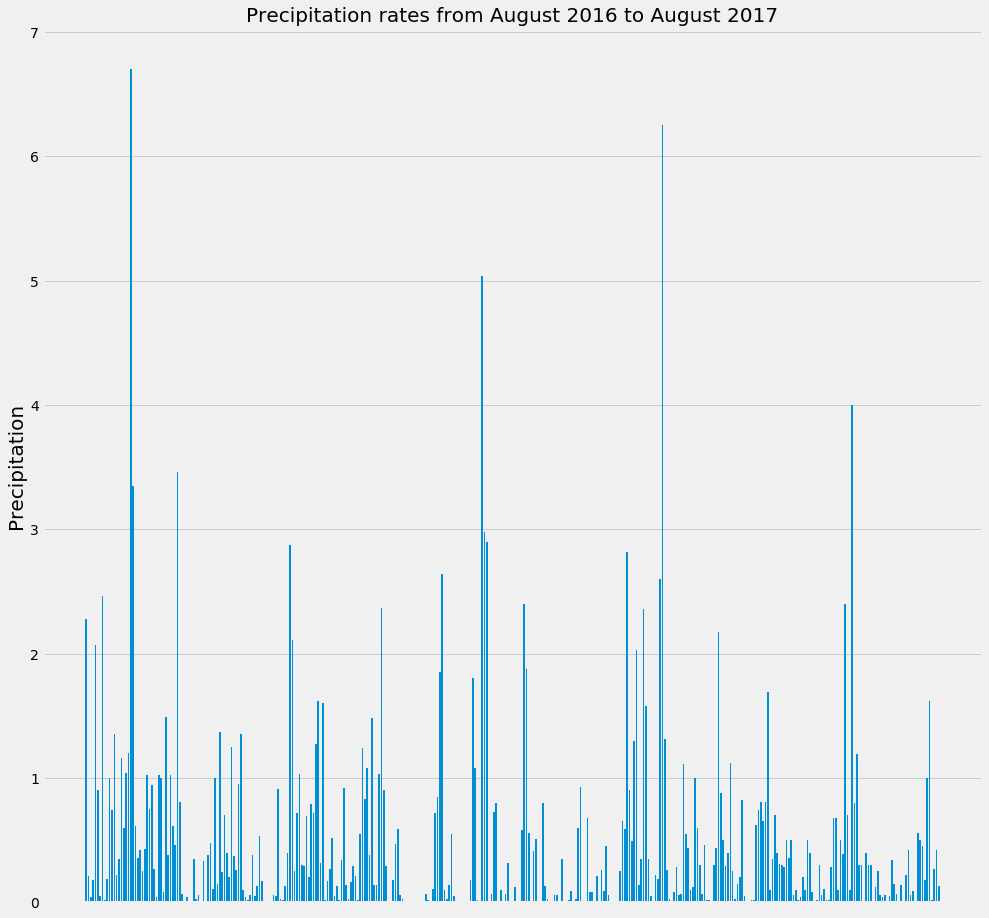

In [285]:
plt.figure(figsize=[15,15]);
y_axis = cleaned_df1["prcp"]
x_axis = cleaned_df1["date"]                  
tp = plt.bar(x_axis, y_axis, align="center", width =.7);
plt.xticks([], [])
plt.ylabel('Precipitation',  fontsize=20, )
plt.title("Precipitation rates from August 2016 to August 2017", fontsize=20)

plt.show();

![precipitation](Images/precipitation.png)

In [317]:
# Use Pandas to calcualte the summary statistics for the precipitation data
cleaned_df.describe()

,prcp,id,tobs
count,1142.000000,1142.000000,1142.000000
mean,0.311357,11223.670753,74.280210
std,0.576134,5857.642478,4.063511
min,0.010000,2365.000000,58.000000
25%,0.030000,5353.250000,71.000000
50%,0.100000,11952.500000,75.000000
75%,0.310000,14911.750000,77.000000
max,6.700000,19550.000000,87.000000


![describe](Images/describe.png)

In [268]:
# Design a query to show how many stations are available in this dataset?
    
locations = session.query(Station).group_by(Station.station).count()
print(locations)

9


In [269]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

q = (session.query(Measurement.station, func.count(Measurement.station).label("# people"))
    .group_by(Measurement.station).order_by(desc("# people"))
     ).all()
q

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [270]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
active=df.loc[df ["station"] == "USC00519281", :]

mon = active["tobs"].mean()
lowest = active["tobs"].min()
highest = active["tobs"].max()
temp = [lowest, highest, mon]
temp

[59.0, 83.0, 73.0968660968661]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12bfe4390>]],
      dtype=object)

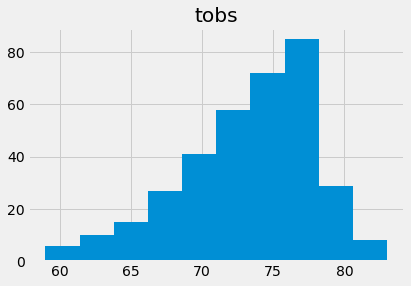

In [271]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active.hist(column='tobs')

![precipitation](Images/station-histogram.png)

In [272]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [307]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
startdate = '2011-02-28'
enddate = '2011-03-05'
results1 = calc_temps(startdate,enddate)[0]
results1

(61.0, 69.75510204081633, 75.0)

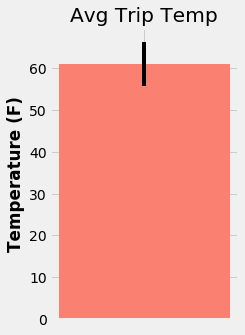

In [309]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

plt.figure(figsize=(3,5))                               
plt.bar(1, results1[0], yerr=(results1[2] - results1[1]), tick_label='', color='salmon')
plt.ylabel("Temperature (F)", weight="bold")
plt.title("Avg Trip Temp")
plt.show()



In [323]:
# calculates the rainfall per weather station using the previous year's matching dates.

lyrain = session.query(Measurement.station, Station.name, func.sum(Measurement.prcp).label('precipitation')).\
filter(Measurement.station == Station.station, Measurement.date >= startdate, Measurement.date <= enddate).\
group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()

In [324]:
new_rainfall = pd.DataFrame(lyrain)                                 
new_rainfall = new_rainfall.set_index('station')                                                                                   
new_rainfall 

,name,precipitation
station,,
USC00518838,"UPPER WAHIAWA 874.3, HI US",2.33
USC00519281,"WAIHEE 837.5, HI US",2.23
USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2.19
USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",1.96
USC00516128,"MANOA LYON ARBO 785.2, HI US",1.45
USC00513117,"KANEOHE 838.1, HI US",1.44
USC00519397,"WAIKIKI 717.2, HI US",1.38
USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",0.63
USC00517948,"PEARL CITY, HI US",NaN
